In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
deltime=pd.read_csv("D:\\EXCELR Docs\\delivery_time.csv")
deltime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
deltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
deltime.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\shefs\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

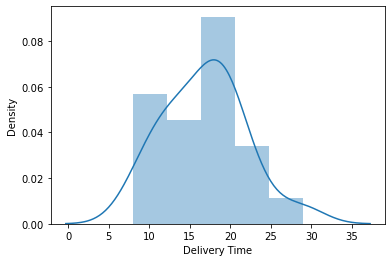

In [11]:
sns.distplot(deltime['Delivery Time'])

C:\Users\shefs\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

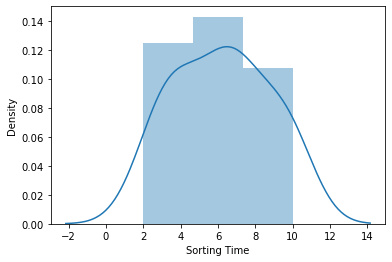

In [12]:
sns.distplot(deltime['Sorting Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

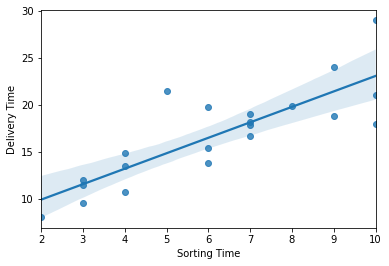

In [13]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=deltime)

In [14]:
import statsmodels.formula.api as smf

In [20]:
deltime=deltime.rename({'Delivery Time':'DT'},axis=1)
deltime=deltime.rename({'Sorting Time':'ST'},axis=1)
deltime

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [21]:
import statsmodels.formula.api as smf

In [23]:
model=smf.ols("DT~ST",data=deltime).fit()


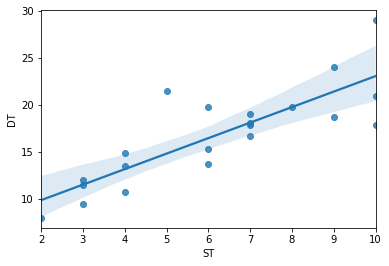

In [25]:
sns.regplot(x='ST',y='DT',data=deltime);

In [26]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [27]:
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [32]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [33]:
newdata=pd.Series([30,11])
newdata

0    30
1    11
dtype: int64

In [34]:
pred=pd.DataFrame(newdata,columns=['ST'])
pred

,ST
0,30
1,11


In [35]:
model.predict(pred)

0    56.053331
1    24.721953
dtype: float64

In [36]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [39]:
deltime['Predicted']=model.fittedvalues
deltime

,DT,ST,Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913
